# DIVAnd full analysis of the Caribbean sea

## Import packages

In [77]:
using NCDatasets
using PhysOcean
using Downloads
using DataStructures
using DIVAnd
using Dates
using Statistics
using Random
using PhysOcean
using Makie, CairoMakie, GeoMakie
using Glob
using JupyterFormatter
enable_autoformat()
using Pkg
Pkg.add(PackageSpec(name = "PhysOcean", rev = "master"))
include("/home/ctroupin/Projects/Diva-Workshops/notebooks/config.jl")

    Updating git-repo `https://github.com/gher-uliege/PhysOcean.jl.git`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


"https://dox.uliege.be/index.php/s/qJtEotmkCZVqcx8/download"

## Files and directories

In [ ]:
outputdir = "/home/ctroupin/data/EMODnet-Chemistry/Eutrophication2024/Results/Carribean/"
isdir(outputdir) ? @debug("ok") : mkpath(outputdir)

## List of variables + attributes

In [138]:
# Name of the variables (EMODnet Chemistry)
varlist = [
    "Water body phosphate",
    "Water body chlorophyll-a",
    "Water body dissolved inorganic nitrogen (DIN)",
    "Water body ammonium",
    "Water body silicate",
    "Water body dissolved oxygen concentration",
]

varinfo2 = Dict(
    "Water body dissolved oxygen concentration" => Dict(
        # http://vocab.nerc.ac.uk/collection/P02/current/
        "search_keywords_urn" => ["SDN:P02::DOXY"],
        "netcdf_units" => "umol/l",
        # http://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html
        "netcdf_standard_name" => "mole_concentration_of_dissolved_molecular_oxygen_in_sea_water",
        "woa_depthr" => [
            0.0,
            5.0,
            10.0,
            15.0,
            20.0,
            25.0,
            30.0,
            35.0,
            40.0,
            45.0,
            50.0,
            55.0,
            60.0,
            65.0,
            70.0,
            75.0,
            80.0,
            85.0,
            90.0,
            95.0,
            100.0,
            125.0,
            150.0,
            175.0,
            200.0,
            225.0,
            250.0,
            275.0,
            300.0,
            325.0,
            350.0,
            375.0,
            400.0,
            425.0,
            450.0,
            475.0,
            500.0,
            550.0,
            600.0,
            650.0,
            700.0,
            750.0,
            800.0,
            850.0,
            900.0,
            950.0,
            1000.0,
            1050.0,
            1100.0,
            1150.0,
            1200.0,
            1250.0,
            1300.0,
            1350.0,
            1400.0,
            1450.0,
            1500.0,
        ],
        "doi" => "", # Water body dissolved oxygen concentration
    ),
    "Water body phosphate" => Dict(
        # http://vocab.nerc.ac.uk/collection/P02/current/
        "search_keywords_urn" => ["SDN:P02::PHOS"],
        "netcdf_units" => "umol/l",
        # http://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html
        "netcdf_standard_name" => "moles_of_phosphate_per_unit_mass_in_sea_water",
        "woa_depthr" => [
            0.0,
            5.0,
            10.0,
            15.0,
            20.0,
            25.0,
            30.0,
            35.0,
            40.0,
            45.0,
            50.0,
            55.0,
            60.0,
            65.0,
            70.0,
            75.0,
            80.0,
            85.0,
            90.0,
            95.0,
            100.0,
            125.0,
            150.0,
            175.0,
            200.0,
            225.0,
            250.0,
            275.0,
            300.0,
            325.0,
            350.0,
            375.0,
            400.0,
            425.0,
            450.0,
            475.0,
            500.0,
            550.0,
            600.0,
            650.0,
            700.0,
            750.0,
            800.0,
        ],
        "doi" => "", # Water body phosphate
    ),
    "Water body chlorophyll-a" => Dict(
        # http://vocab.nerc.ac.uk/collection/P02/current/
        "search_keywords_urn" => ["SDN:P02::CPWC"],
        "netcdf_units" => "mg/m3",
        # http://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html
        "netcdf_standard_name" => "mass_concentration_of_chlorophyll_in_sea_water",
        "doi" => "", # Water body chlorophyll-a
    ),
    "Water body ammonium" => Dict(
        # http://vocab.nerc.ac.uk/collection/P02/current/
        "search_keywords_urn" => ["SDN:P02::AMON"],
        "netcdf_units" => "umol/l",
        # http://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html
        "netcdf_standard_name" => "mole_concentration_of_ammonium_in_sea_water",
        "doi" => "", # Ammonium
    ),
    "Water body silicate" => Dict(
        # http://vocab.nerc.ac.uk/collection/P02/current/
        "search_keywords_urn" => ["SDN:P02::SLCA"],
        "netcdf_units" => "umol/l",
        # http://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html
        "netcdf_standard_name" => "mole_concentration_of_silicate_in_sea_water",
        "woa_depthr" => [
            0.0,
            5.0,
            10.0,
            15.0,
            20.0,
            25.0,
            30.0,
            35.0,
            40.0,
            45.0,
            50.0,
            55.0,
            60.0,
            65.0,
            70.0,
            75.0,
            80.0,
            85.0,
            90.0,
            95.0,
            100.0,
            125.0,
            150.0,
            175.0,
            200.0,
            225.0,
            250.0,
            275.0,
            300.0,
            325.0,
            350.0,
            375.0,
            400.0,
            425.0,
            450.0,
            475.0,
            500.0,
            550.0,
            600.0,
            650.0,
            700.0,
            750.0,
            800.0,
        ],
        "doi" => "", # Water body silicate
    ),
    "Water body dissolved inorganic nitrogen (DIN)" => Dict(
        # http://vocab.nerc.ac.uk/collection/P02/current/
        "search_keywords_urn" => ["SDN:P02::TDIN"],
        "netcdf_units" => "umol/l",
        # http://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html
        "netcdf_standard_name" => "mole_concentration_of_dissolved_inorganic_nitrogen_in_sea_water",
        "doi" => "", # Water body dissolved inorganic nitrogen (DIN)
    ),
)


Dict{String, Dict{String, Any}} with 6 entries:
  "Water body ammonium"     => Dict("netcdf_standard_name"=>"mole_concentration…
  "Water body phosphate"    => Dict("netcdf_standard_name"=>"moles_of_phosphate…
  "Water body chlorophyll-… => Dict("netcdf_standard_name"=>"mass_concentration…
  "Water body silicate"     => Dict("netcdf_standard_name"=>"mole_concentration…
  "Water body dissolved ox… => Dict("netcdf_standard_name"=>"mole_concentration…
  "Water body dissolved in… => Dict("netcdf_standard_name"=>"mole_concentration…

## Configuration
* Define the horizontal, vertical (depth levels) and temporal resolutions.
* Select the variable of interest

In [78]:
dx, dy = 0.25, 0.25
lonr = -70:dx:-58
latr = 10:dy:21
timerange = [Date(1950, 1, 1), Date(2017, 12, 31)];

depthr = [
    0.0,
    5.0,
    10.0,
    15.0,
    20.0,
    25.0,
    30.0,
    40.0,
    50.0,
    66,
    75,
    85,
    100,
    112,
    125,
    135,
    150,
    175,
    200,
    225,
    250,
    275,
    300,
    350,
    400,
    450,
    500,
    550,
    600,
    650,
    700,
    750,
    800,
    850,
    900,
    950,
    1000,
    1050,
    1100,
    1150,
    1200,
    1250,
    1300,
    1350,
    1400,
    1450,
    1500,
    1600,
    1750,
    1850,
    2000,
];
depthr = [0.0, 10.0, 20.0];

In [123]:
project = "EMODNET-chemistry"
varname = "Water_body_dissolved_oxygen_concentration"
yearlist = [1900:2017];
monthlist = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12]];

We create here the variable TS (for "_time selector_"), which allows us to work with the observations corresponding to each period of interest.

In [124]:
TS = DIVAnd.TimeSelectorYearListMonthList(yearlist, monthlist);
@show TS;

TS = TimeSelectorYearListMonthList{Vector{UnitRange{Int64}}, Vector{Vector{Int64}}}(UnitRange{Int64}[1900:2017], [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12]])


## Read the netCDF files

In [144]:
datadir = "/home/ctroupin/data/EMODnet-Chemistry/Eutrophication2024/netCDF/Caribbean/"
datafilelist = Glob.glob("*.nc", datadir);
nfiles = length(datafilelist);
@info("Working on $(nfiles) files");
datafilelist

[ Info: Working on 4 files


4-element Vector{String}:
 "/home/ctroupin/data/EMODnet-Che" ⋯ 49 bytes ⋯ "ean_Water_body_chlorophyll-a.nc"
 "/home/ctroupin/data/EMODnet-Che" ⋯ 66 bytes ⋯ "ssolved_oxygen_concentration.nc"
 "/home/ctroupin/data/EMODnet-Che" ⋯ 45 bytes ⋯ "ribbean_Water_body_phosphate.nc"
 "/home/ctroupin/data/EMODnet-Che" ⋯ 44 bytes ⋯ "aribbean_Water_body_silicate.nc"

Read the data from the file

In [82]:
@time obsval, obslon, obslat, obsdepth, obstime, obsid =
    loadobs(Float64, datafilelist[2], varname);
@info(length(obsval));

  0.041878 seconds (1.47 k allocations: 46.048 MiB, 25.51% gc time)


[ Info: 30810


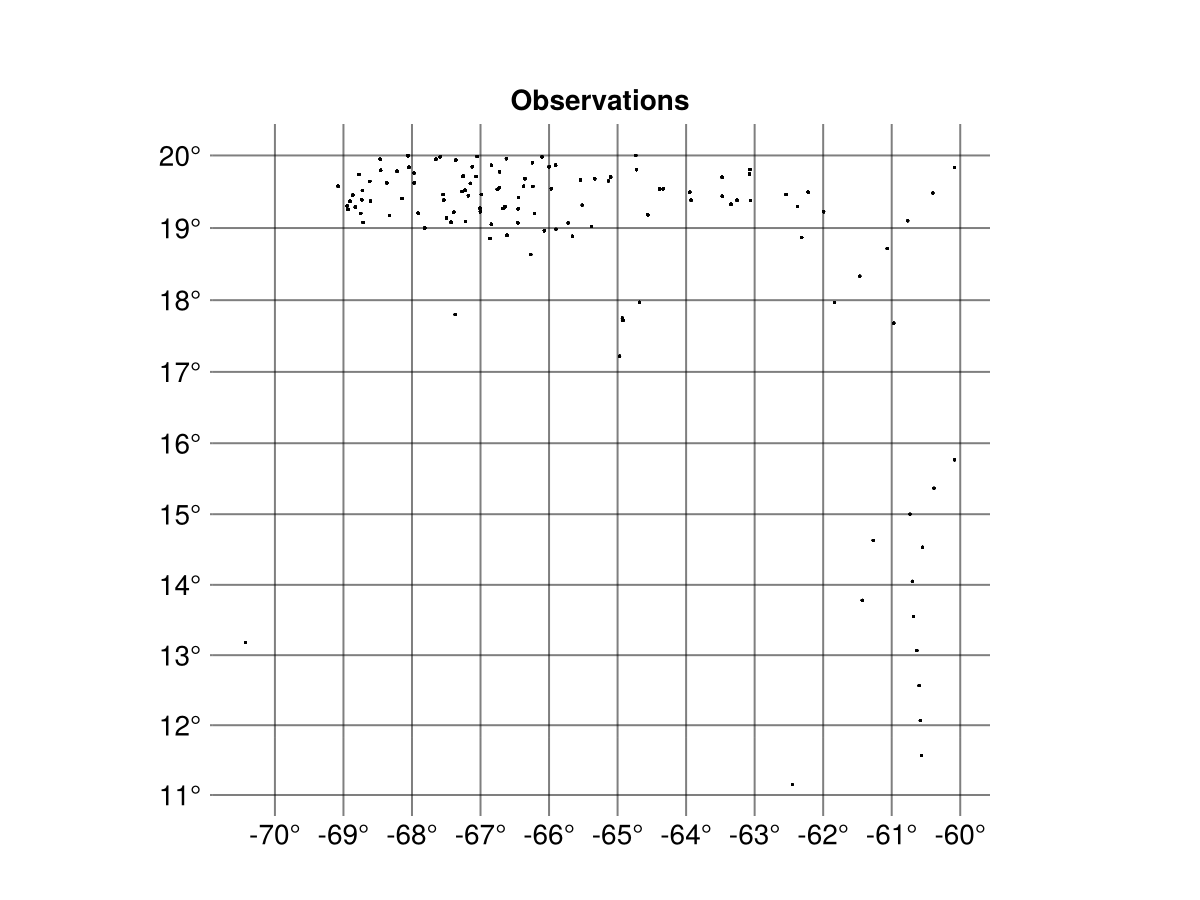

In [83]:
f = GeoMakie.Figure()
ax = GeoAxis(f[1, 1], dest = "+proj=merc", title = "Observations")
GeoMakie.scatter!(ax, obslon, obslat; markersize = 2, color = :black)
GeoMakie.coastlines()
f

Check the extremal values of the observations

In [84]:
checkobs((obslon, obslat, obsdepth, obstime), obsval, obsid)

              minimum and maximum of obs. dimension 1: (-70.42999267578125, -60.0830078125)
              minimum and maximum of obs. dimension 2: (11.149999618530273, 20.0)
              minimum and maximum of obs. dimension 3: (0.0, 5000.0)
              minimum and maximum of obs. dimension 4: (DateTime("1921-11-24T14:00:00"), DateTime("2021-08-10T15:45:00"))
                          minimum and maximum of data: (117.9045181274414, 271.9842834472656)


[ Info: Checking ranges for dimensions and observations


## Extract the bathymetry
It is used to delimit the domain where the interpolation is performed.

### Choice of bathymetry
Modify `bathname` according to the resolution required.

In [85]:
bathname = "/home/ctroupin/data/GEBCO/gebco_30sec_8.nc"

"/home/ctroupin/data/GEBCO/gebco_30sec_8.nc"

In [86]:
@time bx, by, b = load_bath(bathname, true, lonr, latr);

  0.002561 seconds (642 allocations: 1.030 MiB)


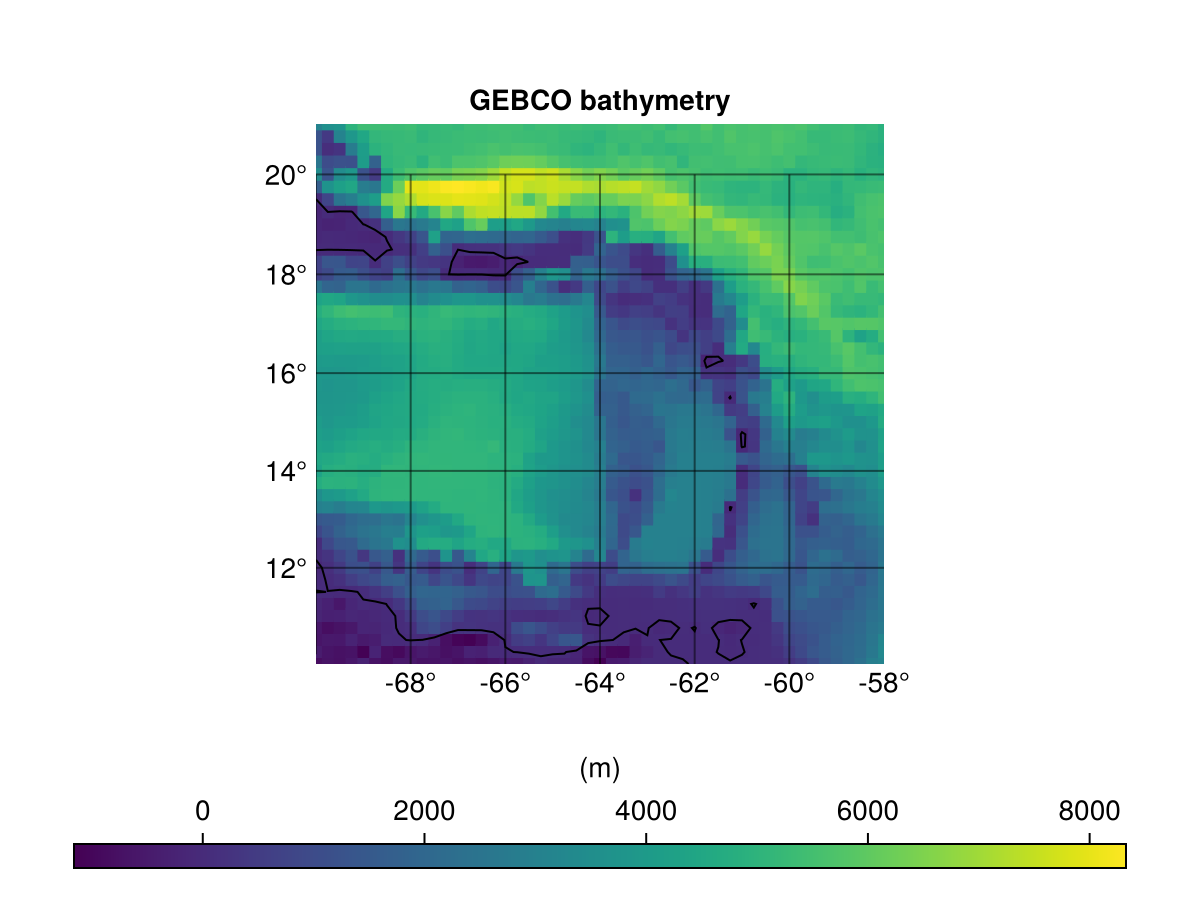

In [87]:
plot_bathy(bx, by, b, xticks = -70.0:2.0:-58.0, yticks = 10.0:2:21.0)

### Create mask
* False for sea        
* True for land

In [88]:
_, _, mask = load_mask(bathname, true, lonr, latr, depthr)

(-70.0:0.25:-58.0, 10.0:0.25:21.0, Bool[0 0 … 1 1; 0 0 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1;;; 0 0 … 1 1; 0 0 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1;;; 0 0 … 1 1; 0 0 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1])

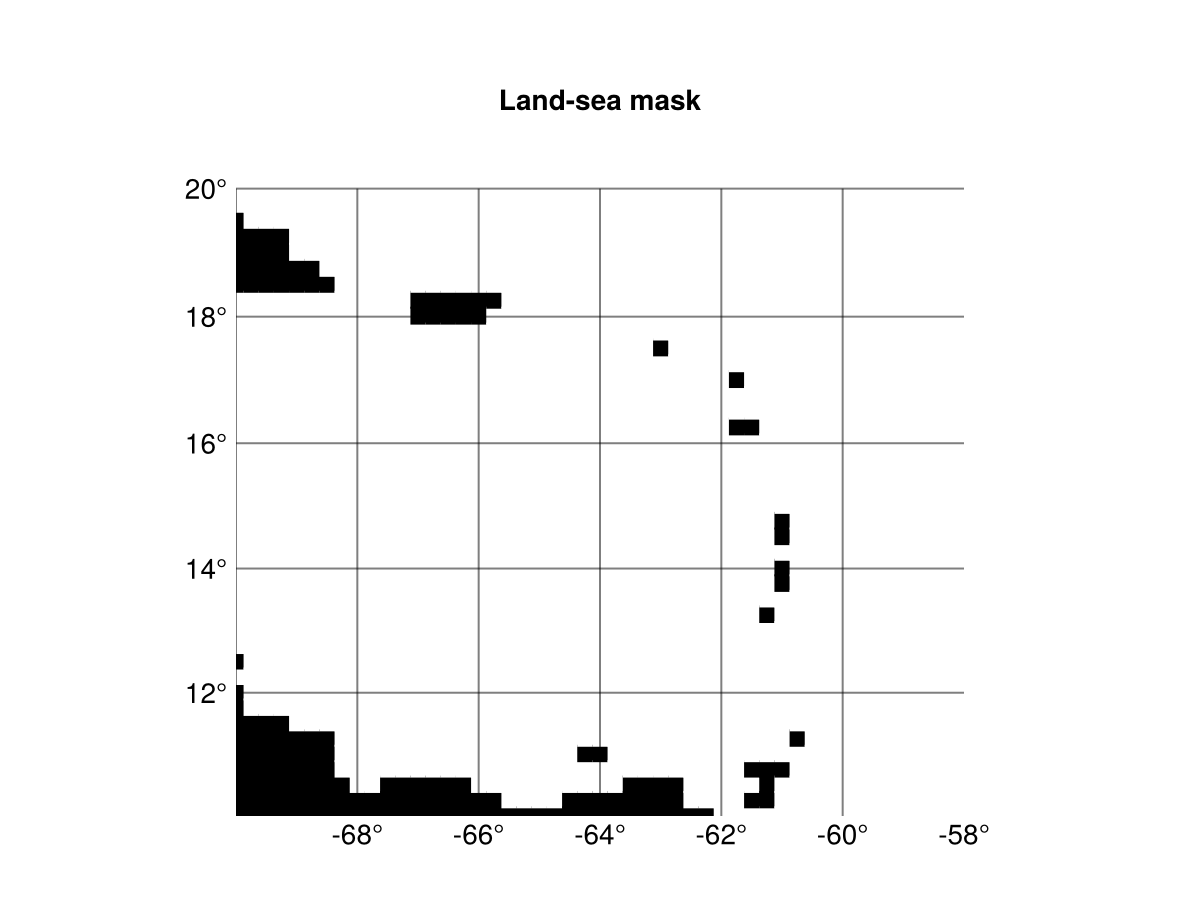

In [89]:
plot_mask(bx, by, mask[:, :, 1], xticks = -70.0:2.0:-58.0, yticks = 10.0:2:21.0)

## Extract data from other sources
As an illustration we use the World Ocean Database, among other possibilities.

### World Ocean Database

In [90]:
# Configuration
if isfile("email.txt")
    email = strip(read("email.txt", String))
    print("getting email address from email.txt")
end
# Or create the variable here:
email = "ctroupin@uliege.be"

woddatadir = "/home/ctroupin/data/WOD/Carribean/"
mkpath(woddatadir);
@info(woddatadir);

#dirnames,indexnames = WorldOceanDatabase.download(lonr,latr, [DateTime(1960,1,1),DateTime(2024,12,31)], 
#    "Oxygen",email,woddatadir)

[ Info: /home/ctroupin/data/WOD/Carribean/


⌛⌛         
Read the data. This can also take up to a few minutes, depending on the size of the domain.

<div class="alert alert-block alert-warning"> 
⚠️ The WOD observations IDs have to be modified in order to be ingested by the XML generation:<br>      
to this end, we add the EDMO code of the U.S. NODC, which is 1977.
</div>

In [91]:
@time obsvalwod, obslonwod, obslatwod, obsdepthwod, obstimewod, obsidwod =
    WorldOceanDatabase.load(Float64, woddatadir, "Oxygen", prefixid = "1977-");
@info("Found $(length(obslatwod)) observations in WOD")

[ Info: Loading files from /home/ctroupin/data/WOD/Carribean/CTD/ocldb1755595510.1476816.CTD.nc
[ Info: Loading files from /home/ctroupin/data/WOD/Carribean/GLD/ocldb1755595510.1476816.GLD.nc
[ Info: Loading files from /home/ctroupin/data/WOD/Carribean/OSD/ocldb1755595510.1476816.OSD.nc
[ Info: Loading files from /home/ctroupin/data/WOD/Carribean/PFL/ocldb1755595510.1476816.PFL.nc


  6.430664 seconds (29.84 M allocations: 1.409 GiB, 2.43% gc time)


[ Info: Found 1415132 observations in WOD


Remove the data outside Adriatic (similar to mask editing)

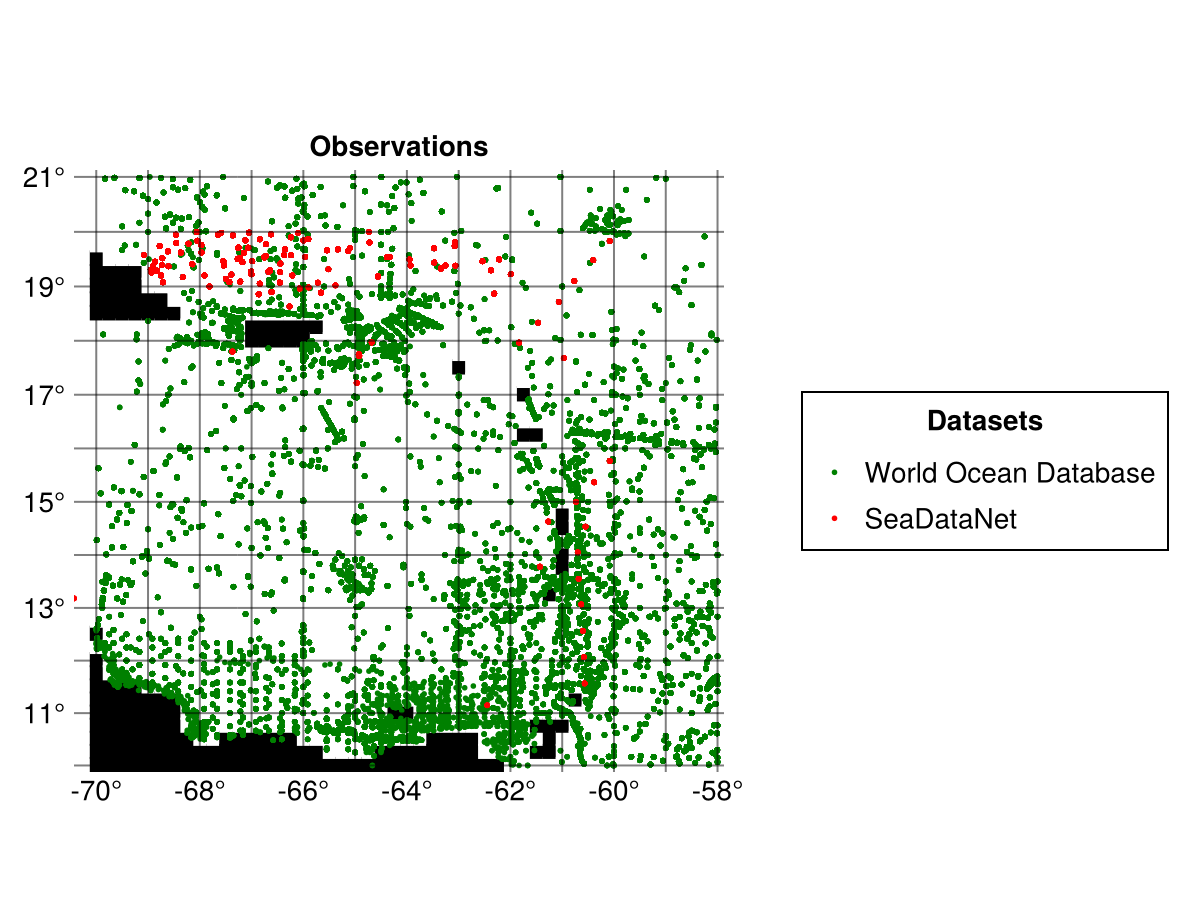

In [92]:
f = Figure()
ax = GeoAxis(f[1, 1], dest = "+proj=merc", title = "Observations")
heatmap!(ax, collect(lonr), collect(latr), mask[:, :, 1], colormap = Reverse(:binary))
scatter!(
    ax,
    obslonwod,
    obslatwod;
    markersize = 4,
    color = :green,
    label = "World Ocean Database",
)
scatter!(ax, obslon, obslat; markersize = 4, color = :red, label = "SeaDataNet")
Legend(f[1, 2], ax, "Datasets")
f

## Remove duplicates
⌛ The idea here to remove the duplicates coming from the combination of two datasets: SeaDataNet and World Ocean Database. If one has to perform a duplicate detection on a unique dataset (for instance SeaDataNet only), a similar procedure can be applied, as explained below.

### Criteria 
Some values have to be set for the tolerance concerning the positions, times and values of the observations:
* Horizontal distance: 0.01 degree (about 1km)
* Vertical separation: 0.01 m depth
* Time separation: 1 minute.      
* Salinity difference:  0.01 psu.
Such values can be tested and adapted according to the application, the dataset etc. Once the parameters have been set, the following command allows one to identify the _potential_ duplicates:

In [93]:
@time dupl = DIVAnd.Quadtrees.checkduplicates(
    (obslon, obslat, obsdepth, obstime),
    obsval,
    (obslonwod, obslatwod, obsdepthwod, obstimewod),
    obsvalwod,
    (0.01, 0.01, 0.01, 1 / (24 * 60)),
    0.01,
);

  8.490123 seconds (8.56 M allocations: 505.543 MiB, 7.05% gc time)


Find the indices of the possible duplicates:

In [94]:
index = findall(.!isempty.(dupl));
ndupl = length(index);
pcdupl = round(ndupl / length(obslon) * 100; digits = 2);
@info("Number of possible duplicates: $ndupl")
@info("Percentage of duplicates: $pcdupl%")

[ Info: Number of possible duplicates: 0
[ Info: Percentage of duplicates: 0.0%


In [95]:
append!(obslon, obslonwod);
append!(obslat, obslatwod);
append!(obsdepth, obsdepthwod);
append!(obstime, obstimewod);
append!(obsval, obsvalwod);
append!(obsid, obsidwod);

## Quality control
We remove the extremely low values (-1.0e10) from the dataset.

In [113]:
sel = findall(obsval .> 0.0);
obslon = obslon[sel];
obslat = obslat[sel];
obsdepth = obsdepth[sel];
obstime = obstime[sel];
obsval = obsval[sel];
obsid = obsid[sel];

## Analysis parameters
### Modify data weight 

The new weights are computed in order to take into account the distance between points.    
<div class="alert alert-block alert-info">
ℹ️ If the dataset is large, this can take a few minutes. 
</div>

The maximal and mean values provide an indication of the spatial proximity between the data.    
If you apply this technique, you need to adapt `epsilon2` as `epsilon2 = epsilon2 * rdiag`.

In [96]:
@time rdiag = 1.0 ./ DIVAnd.weight_RtimesOne((obslon, obslat), (0.03, 0.03));
@show maximum(rdiag), mean(rdiag)

[ Info: Computing weights using 1 CPU thread(s)


 51.809230 seconds (20.77 k allocations: 122.256 MiB, 0.03% gc time)
(maximum(rdiag), mean(rdiag)) = (37137.12084038058, 6649.964516937321)


(37137.12084038058, 6649.964516937321)

### Correlation lengths and noise-to-signal ratio
We will use the function `diva3D` for the calculations.     
With this function, the correlation length has to be defined in meters, not in degrees.

In [132]:
sz = (length(lonr), length(latr), length(depthr));
lenx = fill(250_000.0, sz)   # 100 km
leny = fill(250_000.0, sz)   # 100 km
lenz = fill(25.0, sz);      # 25 m 
len = (lenx, leny, lenz);
epsilon2 = 1.0;
#epsilon2 = epsilon2 * rdiag;

### Create the gridded fields using `diva3d`
Here only the noise-to-signal ratio is estimated.     
Set `fitcorrlen` to `true` to also optimise the correlation length.

### Loop on the variables

In [142]:
nvar = length(varlist)
theyear = 2025
for iii = 1:nvar

    varname = varlist[iii]
    @info("Working on $(varlist[iii])")

    varname_nospace = replace(varlist[iii], " (DIN)" => "", " " => "_")
    filename = joinpath(outputdir, "Water_body_$(varname_nospace)).nc")
    isfile(filename) ? rm(filename) : @debug("ok")


    P35 = Vocab.SDNCollection("P35")
    c = Vocab.findbylabel(P35, [varlist[iii]])[1]
    parameter_keyword_urn = Vocab.notation(c)

    @info(varname_nospace)

    metadata = OrderedDict(
        "title" => "European seas - DIVAnd 4D monthly analysis of $(varlist[iii]) 1960/2024 v$(theyear)",
        "project" => "EMODNET-chemistry",
        "institution_urn" => "SDN:EDMO::1579",
        "production" => "University of Liège, GeoHydrodynamics and Environment Research",
        "Author_e-mail" => [
            "Charles Troupin <ctroupin@uliege.be>",
            "Alexander Barth <A.Barth@uliege.be>",
        ],
        "source" => "Observations from EMODnet-Chemistry",
        "comment" => "Monthly climatology",
        "parameter_keyword_urn" => parameter_keyword_urn,
        "search_keywords_urn" => varinfo2[varlist[iii]]["search_keywords_urn"],
        "area_keywords_urn" => ["SDN:C19::1_10"],
        "product_version" => "v$(theyear)",
        "product_code" => "All Europeans Seas-$(varlist[iii])-v$(theyear)-ANA",
        "bathymetry_source" => "The GEBCO Digital Atlas published by the British Oceanographic Data Centre on behalf of IOC and IHO, 2003",
        "netcdf_standard_name" => varinfo2[varlist[iii]]["netcdf_standard_name"],
        "netcdf_long_name" => varlist[iii],
        "netcdf_units" => varinfo2[varlist[iii]]["netcdf_units"],
        "DIVA_references" => "Barth, A., Beckers, J.-M., Troupin, C., Alvera-Azcarate, A., and Vandenbulcke, L. (2014): divand-1.0: n-dimensional variational data analysis for ocean observations, Geosci. Model Dev., 7, 225-241, doi: 10.5194/gmd-7-225-2014",
        "data_access" => "https://emodnet.ec.europa.eu/geoviewer",
        "WEB_visualisation" => "https://emodnet.ec.europa.eu/geoviewer",
        "acknowledgement" => "Aggregated data products are generated by EMODnet Chemistry under the support of DG MARE Call for Tenders EASME/EMFF/2016/006-lot4, EASME/2019/OP/0003-lot4.",
        "documentation" => "https://doi.org/10.13120/fa5c704a-a5ea-4f60-91b5-2bf6a7aded45",
        "doi" => varinfo2[varlist[iii]]["doi"],
    )

    # Get the attributes from the Vocab server    
    ncglobalattrib, ncvarattrib =
        SDNMetadata(metadata, basename(filename), varname, lonr, latr)

        @time dbinfo = diva3d(
        (lonr, latr, depthr, TS),
        (obslon, obslat, obsdepth, obstime),
        obsval,
        len,
        epsilon2,
        filename,
        varname,
        bathname = bathname,
        fitcorrlen = false,
        niter_e = 2,
        ncvarattrib = ncvarattrib,
        ncglobalattrib = ncglobalattrib,
        surfextend = true,
        coeff_derivative2 = [0.,0.,1e-8],
    );

end

[ Info: Working on Water body phosphate
[ Info: Water_body_phosphate
[ Info: Working on Water body chlorophyll-a
[ Info: Water_body_chlorophyll-a
[ Info: Working on Water body dissolved inorganic nitrogen (DIN)
[ Info: Water_body_dissolved_inorganic_nitrogen
[ Info: Working on Water body ammonium
[ Info: Water_body_ammonium
[ Info: Working on Water body silicate
[ Info: Water_body_silicate
[ Info: Working on Water body dissolved oxygen concentration
[ Info: Water_body_dissolved_oxygen_concentration


[ Info: Creating netCDF file /home/ctroupin/data/EMODnet-Chemistry/Eutrophication2024/Results/Carribean/Water_body_Water_body_dissolved_oxygen_concentration.nc
[ Info: Time step 1 / 12
[ Info: scaled correlation length (min,max) in dimension 1: (250000.0, 250000.0)
[ Info: scaled correlation length (min,max) in dimension 2: (250000.0, 250000.0)
[ Info: scaled correlation length (min,max) in dimension 3: (25.0, 25.0)
[ Info: number of windows: 1
[ Info: number of windows: 1
[ Info: Time step 2 / 12
[ Info: scaled correlation length (min,max) in dimension 1: (250000.0, 250000.0)
[ Info: scaled correlation length (min,max) in dimension 2: (250000.0, 250000.0)
[ Info: scaled correlation length (min,max) in dimension 3: (25.0, 25.0)
[ Info: number of windows: 1
[ Info: number of windows: 1
[ Info: Time step 3 / 12
[ Info: scaled correlation length (min,max) in dimension 1: (250000.0, 250000.0)
[ Info: scaled correlation length (min,max) in dimension 2: (250000.0, 250000.0)
[ Info: scaled co

 12.100655 seconds (269.32 k allocations: 10.060 GiB, 65.54% gc time)


### Save the observation metadata

In [104]:
# DIVAnd.saveobs(filename,(obslon,obslat,obsdepth,obstime),obsid);
DIVAnd.saveobs(
    filename,
    "salinity obs",
    obsval,
    (obslon, obslat, obsdepth, obstime),
    obsid,
    used = dbinfo[:used],
)
#DIVAnd.saveobs(filename, "Oxygen data", obsval, (obslon,obslat,obsdepth,obstime),obsid)

## XML metadata

For DIVAnd analysis using SeaDataCloud/EMODnet-Chemistry data, one can create a XML description for the product for Sextant.

Download CDI list

In [105]:
cdilist = joinpath(datadir, "CDI-list-export.zip")
if !isfile(cdilist)
    Downloads.download("http://emodnet-chemistry.maris2.nl/download/export.zip", cdilist)
end

If `ignore_errors` is `false` (default), then a missing CDI will stop the creatation of the XML metadata.

In [106]:
ignore_errors = true

# File name based on the variable (but all spaces are replaced by underscores)
xmlfilename = joinpath(outputdir, "Water_body_$(replace(varname," "=>"_")).xml")

"/home/ctroupin/data/EMODnet-Chemistry/Eutrophication2024/Results/Carribean/Water_body_Water_body_dissolved_oxygen_concentration.xml"

## Generate a XML file for Sextant catalog
Uncomment the following line of you are using SeaDataCloud or EMODnet-Chemistry data.

<div class="alert alert-block alert-warning"> 
⚠️ This step requires an internet connection. If the code is running on a machine without a connection, then the global and variable attributes have to be prepared before the main run and saved to files. 
</div>

In [107]:
# divadoxml(filename,varname,project,cdilist,xmlfilename, ignore_errors = ignore_errors)